## Classification with Python

Hopefully now you are feeling a bit more comfortable with Python, Kaggle, and modeling. 

This next homework will test your classification abilities. We will be trying to predict whether a person survived the Titantic:

https://www.kaggle.com/c/titanic

The evalution metric for Kaggle is accuracy, but please also explore how well your model does on multiple metrics like F1, precision, recall, and area under the ROC curve.

### Grading

This homework is due **March 8, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model evaluation: Did you evaluate your model on multiple metrics? Where does your model do well? Where could it be improved? How are the metrics different?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

#### Import Data

In [2]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [3]:
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data Exploration

In [4]:
traindf.shape

(891, 12)

In [5]:
testdf.shape

(418, 11)

In [6]:
def nulls():
    null = traindf.columns[traindf.isnull().any()]
    return null

In [7]:
traindf[nulls()].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
traindf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
train_mean_age = traindf.Age.mean()
traindf.Age.fillna(traindf["Age"].mean(), inplace=True)

In [10]:
traindf.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [11]:
cabin_levels = ['A','B','C','D','E','F','G','T']
traindf.Cabin = traindf.Cabin.apply(lambda x: str(x)[0] if str(x)[0] in cabin_levels else 'NaN')

In [12]:
traindf.Cabin.value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

Text(0.5,1,'Fair Price Distribution by Cabin')

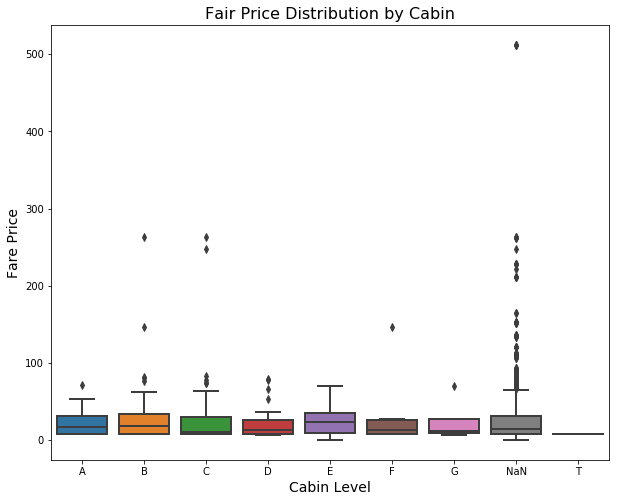

In [13]:
sns.boxplot(x=sorted(traindf["Cabin"]), y=traindf["Fare"], linewidth=2)
plt.xlabel("Cabin Level", fontsize=14)
plt.ylabel("Fare Price", fontsize=14)
plt.title("Fair Price Distribution by Cabin", fontsize=16)

Text(0,0.5,'Fare Price ($)')

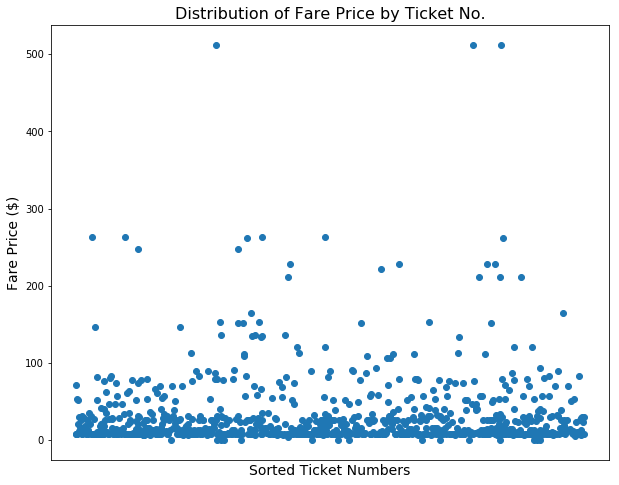

In [14]:
plt.scatter(sorted(traindf.Ticket),traindf.Fare)
plt.xticks([])
plt.title("Distribution of Fare Price by Ticket No.", fontsize=16)
plt.xlabel("Sorted Ticket Numbers", fontsize=14)
plt.ylabel("Fare Price ($)", fontsize=14)

The above graph displays the 'Fair Price' by 'Ticket Number'. By sorting the ticket numbers, I was able to see that there is no correlation between ticket number 

#### Data Cleaning

**Variables to Drop**

- PassengerId- As an arbitrary identifier, it provides no predictive power
- Name- This variable is also an arbitrary identifier.
- Ticket- 
- Cabin 

In [15]:
traindf.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

**Variables to Transform**

In [16]:
traindf.iloc[871]

PassengerId        872
Survived             1
Pclass               1
Sex             female
Age                 47
SibSp                1
Parch                1
Fare           52.5542
Embarked             S
Name: 871, dtype: object

In [17]:
traindf.Sex = traindf.Sex.apply(lambda x: 1 if x == 'male' else 0) 

In [18]:
traindf.Sex.value_counts(dropna=True)

1    577
0    314
Name: Sex, dtype: int64

In [19]:
traindf = pd.get_dummies(traindf, columns=["Embarked"])

In [20]:
traindf.iloc[871]

PassengerId    872.0000
Survived         1.0000
Pclass           1.0000
Sex              0.0000
Age             47.0000
SibSp            1.0000
Parch            1.0000
Fare            52.5542
Embarked_C       0.0000
Embarked_Q       0.0000
Embarked_S       1.0000
Name: 871, dtype: float64

### Modeling

In [21]:
target = traindf.Survived
traindf.drop(["PassengerId", "Survived"], axis=1, inplace=True)

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(traindf, target, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [27]:
kn_clf = KNeighborsClassifier()

In [28]:
gridsearch_kn = GridSearchCV(kn_clf, {"n_neighbors": [1,3,5,7,9,11], "weights": ['uniform', 'distance'],
                                  "p":[1,2,3]}, scoring='f1')
gridsearch_kn.fit(xtrain, ytrain)
print("Best Parameters: {}".format(gridsearch_kn.best_params_))
knclf_ypredict_train = gridsearch_kn.predict(xtrain)
print("Training F1 Score: {}".format(f1_score(ytrain, knclf_ypredict_train)))

print("Test Classification Report:")
knclf_ypredict_test = gridsearch_kn.predict(xtest)
print(classification_report(ytest, knclf_ypredict_test))

print("Train Accuracy: {}\nTest Accuracy: {}".format(accuracy_score(ytrain, knclf_ypredict_train), 
                                                     accuracy_score(ytest, knclf_ypredict_test)))

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Training F1 Score: 0.9732824427480916
Test Classification Report:
             precision    recall  f1-score   support

          0       0.73      0.86      0.79       105
          1       0.73      0.55      0.63        74

avg / total       0.73      0.73      0.72       179

Train Accuracy: 0.9803370786516854
Test Accuracy: 0.7318435754189944


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier()
gridsearch_rf = GridSearchCV(rf_clf, {"n_estimators": [1000, 2500, 5000], 
                                      "class_weight": ['balanced', None], "max_depth": [1,3,5,7,9,11]},
                            scoring='f1')
gridsearch_rf.fit(xtrain, ytrain)
print("Best Parameters: {}".format(gridsearch_rf.best_params_))
rfclf_ypredict_train = gridsearch_rf.predict(xtrain)
print("Training F1 Score: {}".format(f1_score(ytrain, rfclf_ypredict_train)))

print("Test Classification Report:")
rfclf_ypredict_test = gridsearch_rf.predict(xtest)
print(classification_report(ytest, rfclf_ypredict_test))

print("Train Accuracy: {}\nTest Accuracy: {}".format(accuracy_score(ytrain, rfclf_ypredict_train),
                                                    accuracy_score(ytest, rfclf_ypredict_test)))

Best Parameters: {'class_weight': 'balanced', 'max_depth': 7, 'n_estimators': 5000}
Training F1 Score: 0.8622047244094487
Test Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       105
          1       0.80      0.72      0.76        74

avg / total       0.81      0.81      0.81       179

Train Accuracy: 0.901685393258427
Test Accuracy: 0.8100558659217877


In [29]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
testdf.Age.fillna(train_mean_age, inplace=True)
testdf.Fare.fillna(traindf.Fare.mean(), inplace=True)
testdf.Sex = testdf.Sex.apply(lambda x: 1 if x == 'male' else 0)
test_id = testdf.PassengerId
testdf = pd.get_dummies(testdf, columns=["Embarked"])
testdf.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [31]:
testdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [43]:
predictions = gridsearch_rf.best_estimator_.predict(testdf)

In [44]:
submission = test_id.to_frame()
submission['Survived'] = predictions

In [45]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
submission.to_csv("submission2.csv", index=False)

In [47]:
ls

Homework_4.ipynb       submission1.csv        test.csv
gender_submission.csv  submission2.csv        train.csv
